# **Ex1 - Unsupervised learning**

## Names and IDs

1.   Dan Vaitzman 318940913
2.   Guy Biton 207577875
3.   Ido Dai 207757535

**Introduction**

In this assignment, we will focus on the practical application of unsupervised learning methods, specifically K-means clustering and Principal Component Analysis (PCA). The primary objective is to deepen your understanding of these algorithms and develop proficiency in their implementation using Python and relevant libraries.

**Learning Objectives:**
1.   **Load Local Files**: Implement techniques for
     loading datasets from a local file system into Python.
3.   **Data Visualization**: Apply various visualization techniques to interpret and present your data analysis findings effectively.
4.   **Use Scikit-learn for K-means Clustering**: Use the Scikit-learn library to apply the K-means clustering algorithm.
5.   **Implement Scikit-learn PCA**: Utilize PCA from Scikit-learn to perform dimensionality reduction, a critical technique for analyzing high-dimensional data.
6.   **Algoritmic Understendig**: Solve the calculation problem whle using the algorithms learned in class.








**Important Guidelines:**

**Thoroughly Read the Task Before Implementation:** Ensure to understand the entire assignment and its requirements before beginning to code. A comprehensive understanding will aid in a more structured and efficient approach to the tasks.

**Code Reusability and Function Writing:** Focus on writing reusable code and functions. This practice is crucial for maintaining an organized, efficient, and easily debuggable codebase.





















This assignment is designed to enhance both your theoretical understanding and practical skills in key areas of machine learning. Approach each task with diligence and attention to detail.

## Import All Packages
Add all imports needed for this notebook to run

In [ ]:
# libs
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import math

## 1. Visualization (15 points)
In this section, your task is to create and analyze **three** insightful visualizations based on the customer segmentation dataset. The purpose of these visualizations is to uncover underlying patterns and trends in the data that can inform strategic decisions. Your ability to interpret these visualizations will be key in understanding customer behaviors and preferences.

*   You will get 4 points for the graph and 1 for the insight.



In [ ]:
# load the data
url = "https://raw.githubusercontent.com/guybito/ML_EX1/main/customer_segmentation.csv"
df = pd.read_csv(url)


<ipython-input-86-3dad266d3adb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Education', y='Income', data=df, palette='viridis')


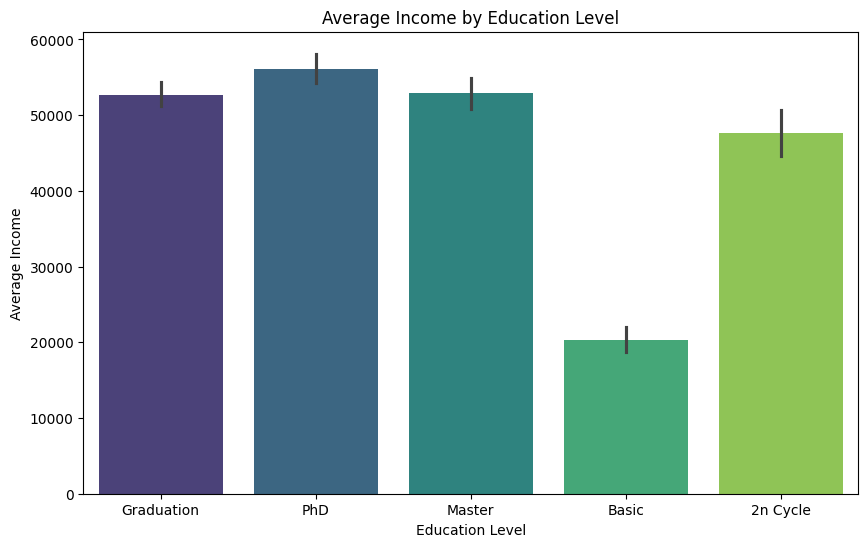

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', data=df, palette='viridis')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.show()

**Insight** -

<ipython-input-87-3368f4242975>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Response', y='Recency', data=df, palette='muted')


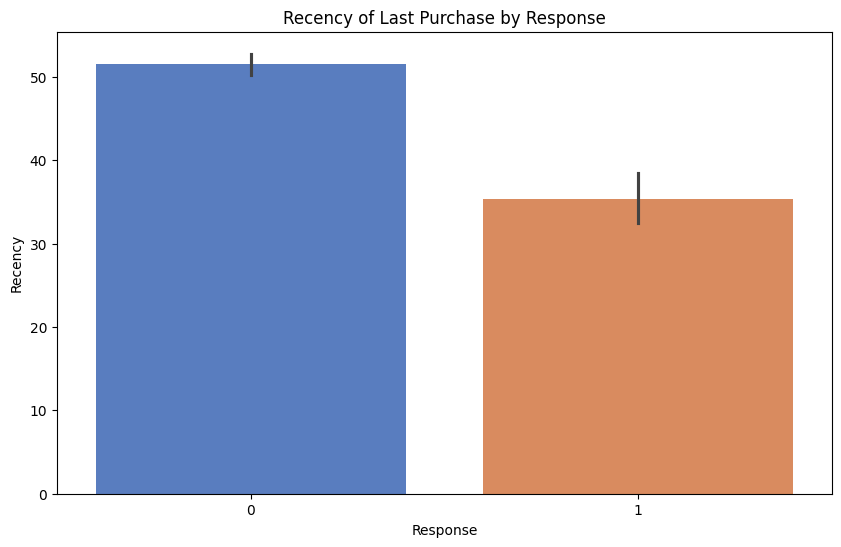

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Recency', data=df, palette='muted')
plt.title('Recency of Last Purchase by Response')
plt.xlabel('Response')
plt.ylabel('Recency')
plt.show()

**Insight** -

<ipython-input-88-ebf572f980e1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


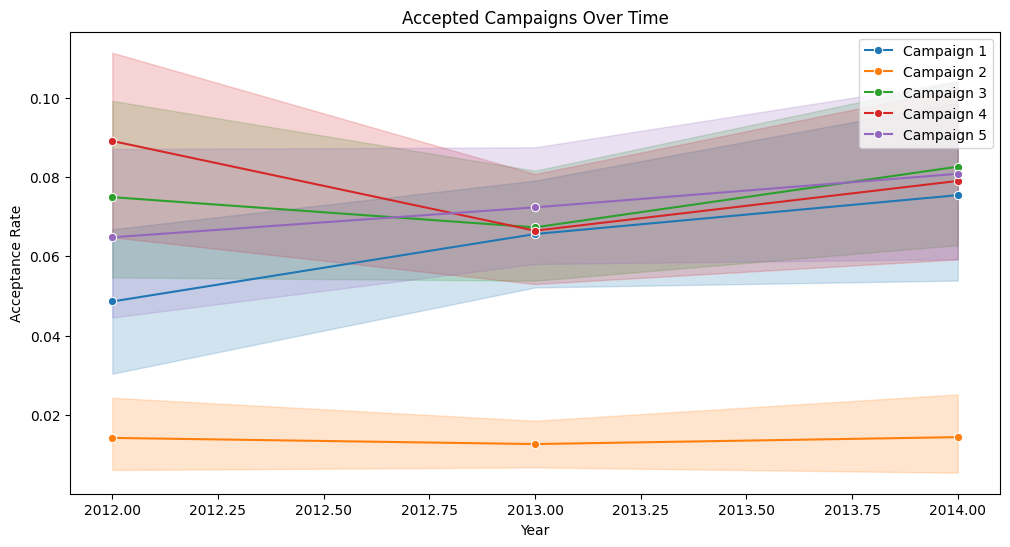

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

plt.figure(figsize=(12, 6))
df['Year'] = df['Dt_Customer'].dt.year
sns.lineplot(x='Year', y='AcceptedCmp1', data=df, marker='o', label='Campaign 1')
sns.lineplot(x='Year', y='AcceptedCmp2', data=df, marker='o', label='Campaign 2')
sns.lineplot(x='Year', y='AcceptedCmp3', data=df, marker='o', label='Campaign 3')
sns.lineplot(x='Year', y='AcceptedCmp4', data=df, marker='o', label='Campaign 4')
sns.lineplot(x='Year', y='AcceptedCmp5', data=df, marker='o', label='Campaign 5')
plt.title('Accepted Campaigns Over Time')
plt.xlabel('Year')
plt.ylabel('Acceptance Rate')
plt.legend()
plt.show()

**Insight** -

## 2. KMEANS (35 points)

In this exercise, you will implement K-means clustering on a comprehensive customer dataset, to identify distinct customer segments.

*   Load the data again.
*   Scale the data using minmax scaler (2 points).
*   Encode categorical variables (3 points).
*   Apply k-Means algorithm on the 'MntMeatProducts' and 'MntWines' features using n_clusters=5
 (10 points).
*   Visualize the clusters (5 points).
*   Apply k-Means algorithm on all features and find the best k using 2 methods (10 points).
*   Visualize the methods (5 points).










In [ ]:
# load the data
url = "https://raw.githubusercontent.com/guybito/ML_EX1/main/customer_segmentation.csv"
df = pd.read_csv(url)

In [ ]:
# Scale the data using MinMaxScaler

# Here we put in list all the numerical columns to scale the data using MinMaxScaler
numerical_columns = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases' ,'NumStorePurchases','NumWebVisitsMonth', 'Z_Revenue']
scaler = MinMaxScaler()

# Drop the NaN values
df.dropna(axis=0, subset=['Income'], inplace=True)

# Normalize the 'Dt_Customer' column to be between 0 and 1
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
min_date = df['Dt_Customer'].min()
max_date = df['Dt_Customer'].max()

df['Dt_Customer'] = (df['Dt_Customer'] - min_date) / (max_date - min_date)

# Drop the not relevant columns
df.drop(['ID', 'Z_CostContact'], axis=1, inplace=True)

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Drop intermediate columns if not needed
categorical_columns = ['Education', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_columns)


<ipython-input-90-a19d8d99d64e>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


<ipython-input-91-283876cf5854>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(center[0], center[1], c=scatter.to_rgba(i), marker='*', s=200, edgecolors='red', linewidth=1, label=f'Cluster {i+1} Center')


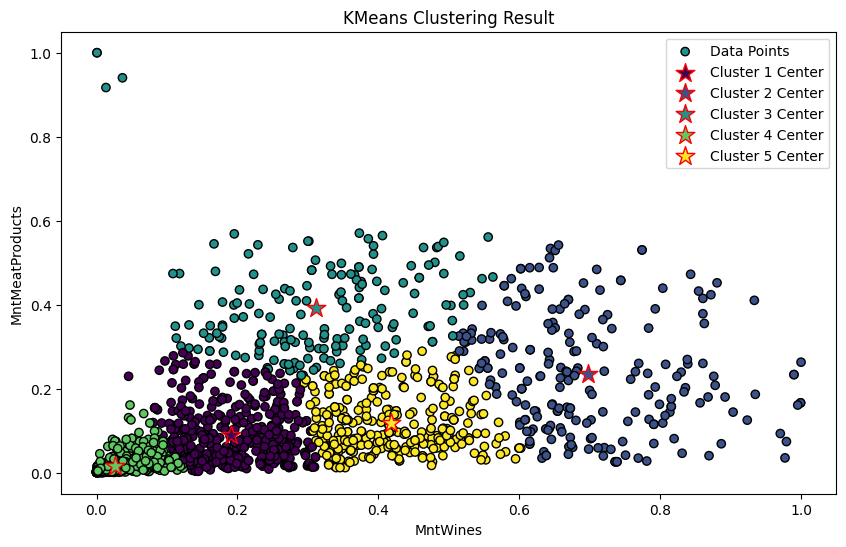

In [ ]:
# Apply k-Means on the 'MntWines' and 'MntMeatProducts' features with n_clusters=5

# Extracting the features for clustering, which include 'MntWines' and 'MntMeatProducts'
features = df[['MntWines', 'MntMeatProducts']].values

# Initializing KMeans clustering with 5 clusters, using K-means++ initialization, and other parameters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Fitting the KMeans model to the features
kmeans.fit(features)

# Getting the cluster labels assigned to each data point
labels = kmeans.labels_

# Retrieving the coordinates of the cluster centers
centers = kmeans.cluster_centers_

# Creating a scatter plot to visualize the clustering result
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', edgecolors='k', label='Data Points')

# Plotting the cluster centers as stars with distinct colors
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c=scatter.to_rgba(i), marker='*', s=200, edgecolors='red', linewidth=1, label=f'Cluster {i+1} Center')

# Adding labels and title to the plot
plt.xlabel('MntWines')
plt.ylabel('MntMeatProducts')
plt.title('KMeans Clustering Result')
plt.legend()

# Displaying the plot
plt.show()





### Elbow

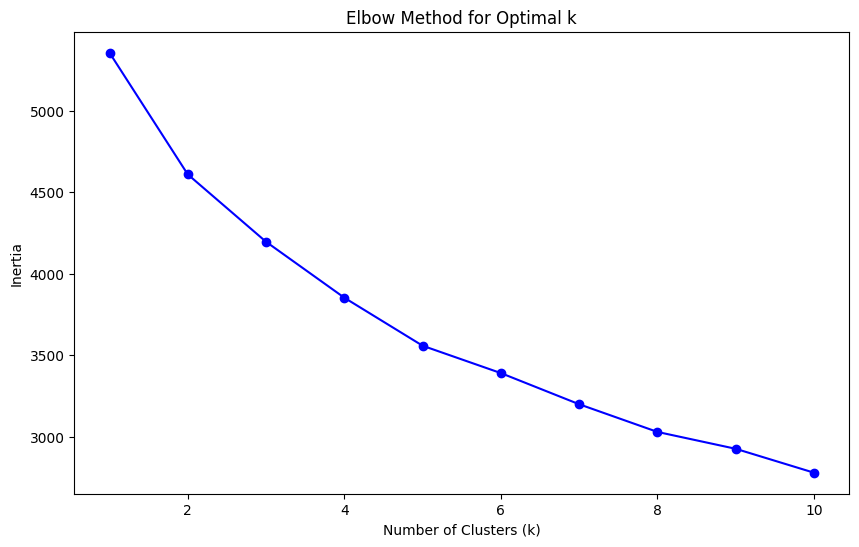

The best value of k based on the Elbow Method is: 2


In [ ]:
# Initialize an empty list to store inertia values for different values of k
inertia = []

# Iterate over different values of k (number of clusters)
for k in range(1, 11):
    # Initialize KMeans with k clusters and other parameters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

    # Fit KMeans model to the data and compute inertia (within-cluster sum of squares)
    kmeans.fit(df)

    # Append inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Find the best k (elbow point)
diff = np.diff(inertia)
elbow_index = np.argmin(diff) + 1
best_k = elbow_index + 1  # Add 1 because indexing starts from 0

print(f"The best value of k based on the Elbow Method is: {best_k}")


### Silhouette Score

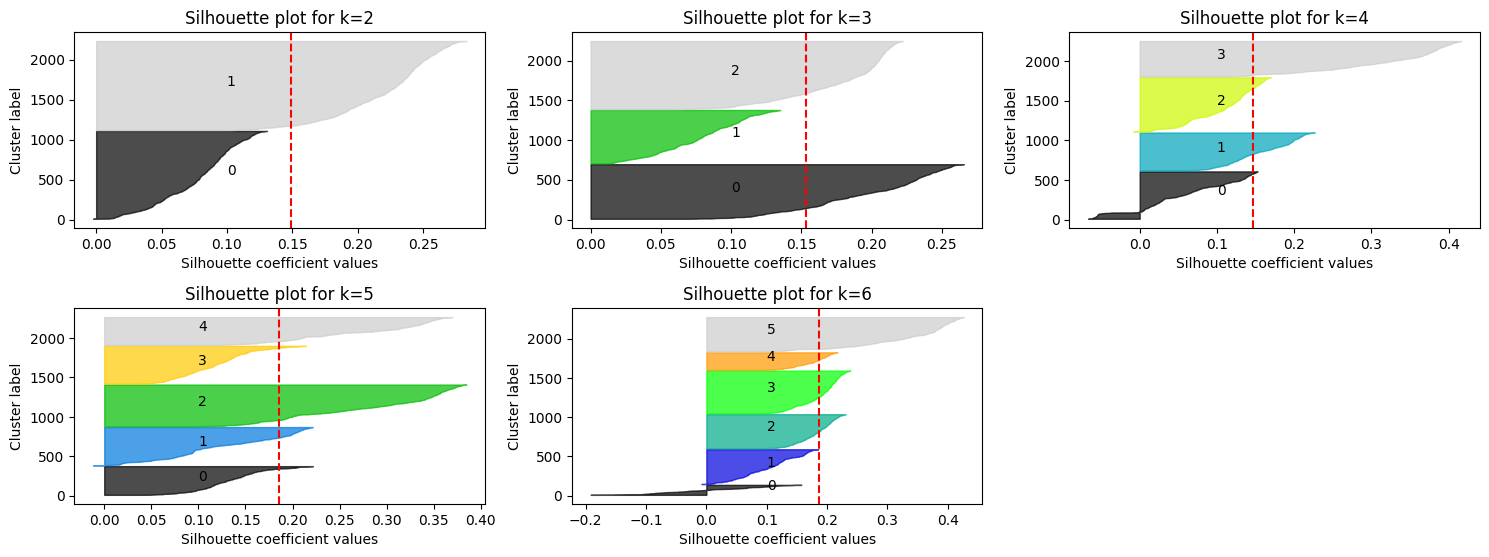

The best value of k based on Silhouette Score is: 6


In [ ]:
# Define range of k values
k_values = range(2, 7)

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))
silhouette_avg_values = []

# Iterate over each k value
for i, k in enumerate(k_values, start=1):
    # Create subplot for each k value
    plt.subplot(3, 3, i)

    # Initialize KMeans with k clusters and other parameters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

    # Fit KMeans model to the data and predict cluster labels
    labels = kmeans.fit_predict(df)

    # Compute silhouette scores for each data point
    silhouette_values = silhouette_samples(df, labels)

    # Compute average silhouette score for the clustering
    silhouette_avg = silhouette_score(df, labels)
    silhouette_avg_values.append(silhouette_avg)

    # Initialize lower y value for silhouette plot
    y_lower = 10

    # Iterate over each cluster to plot silhouette values
    for j in range(k):
        cluster_silhouette_values = silhouette_values[labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / (k - 1))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(0.1, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set title and labels for the subplot
    plt.title(f"Silhouette plot for k={k}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Find the best k value based on Silhouette Score
best_k = k_values[np.argmax(silhouette_avg_values)]
print(f"The best value of k based on Silhouette Score is: {best_k}")


## 3. PCA (15 points)
In this exercise, you will implement PCA:
*   With n_components = 2 (5 points).
*   Visualize the PCA (5 points).
*   Find the variance explined in this PCA (5 points).





[0.34655504 0.32656227]


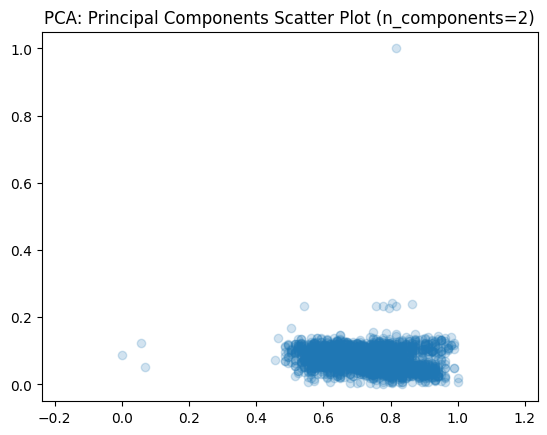

In [ ]:
# # Create a DataFrame with the principal components
n_components = 2
X = df.iloc[: , :].values
pca = PCA(n_components)
pca.fit(X)
principal_components = pca.transform(X)

# Plotting the PCA
plt.scatter(X[:,0], X[:,1], alpha = 0.2)
plt.axis('equal');
plt.title(f'PCA: Principal Components Scatter Plot (n_components={n_components})')

# Display explained variance
print(pca.explained_variance_)

**Q**: What is the variance explained in the 2 component PCA?

**A**:[0.34655504 0.32656227]

## 4. PCA & Kmeans (20 points)
This time, we will use the PCA data for the kmeans model.
*   Run PCA with n_components = 2 (5 points)
*   Find the best k for kmeans (5 points)
*   Plot the best clusters (5 points)
*   Answer the question (5 points)





### Elbow

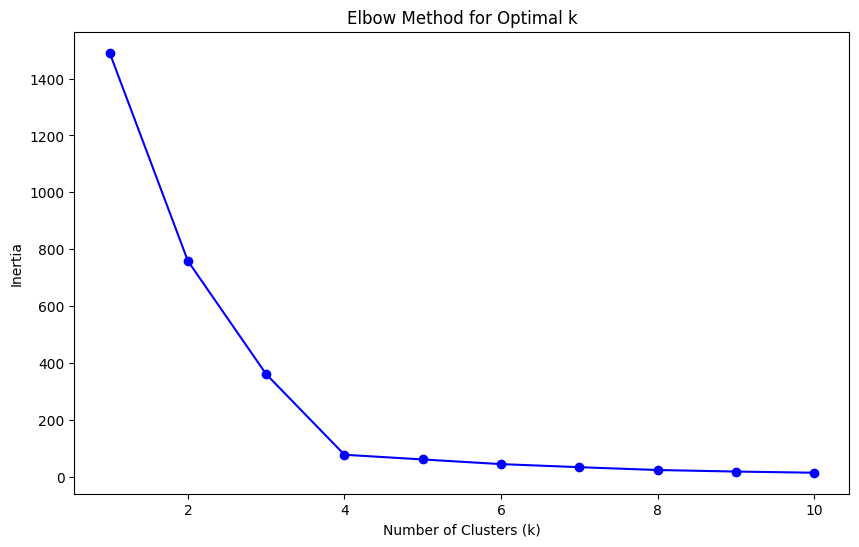

The best value of k based on the Elbow Method is: 2


In [ ]:
# Initialize an empty list to store inertia values for different values of k
inertia = []

# Iterate over different values of k (number of clusters)
for k in range(1, 11):
    # Initialize KMeans with k clusters and other parameters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

    # Fit KMeans model to the principal components data and compute inertia
    kmeans.fit(principal_components)

    # Append inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Find the best k (elbow point)
diff = np.diff(inertia)
elbow_index = np.argmin(diff) + 1
best_k = elbow_index + 1  # Add 1 because indexing starts from 0

print(f"The best value of k based on the Elbow Method is: {best_k}")


### Silhouette

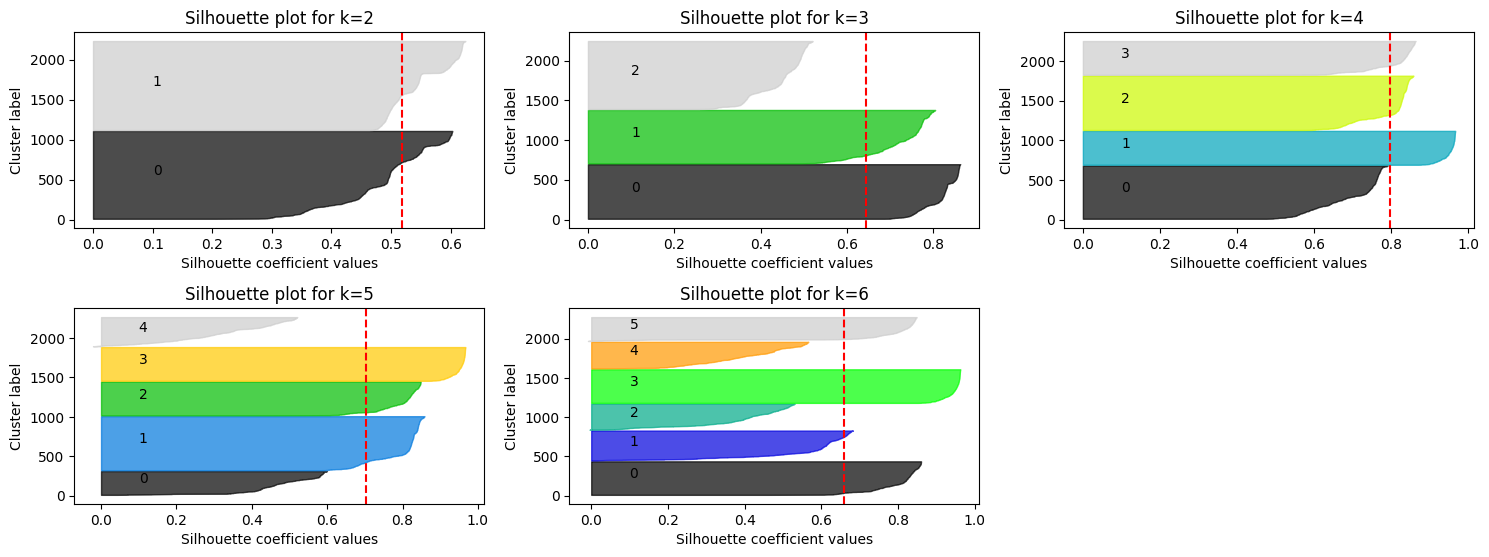

The best value of k based on Silhouette Score is: 4


In [ ]:
# Define range of k values
k_values = range(2, 7)

# Initialize a figure for plotting
plt.figure(figsize=(15, 8))
silhouette_avg_values = []

# Iterate over each k value
for i, k in enumerate(k_values, start=1):
    # Create subplot for each k value
    plt.subplot(3, 3, i)

    # Initialize KMeans with k clusters and other parameters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

    # Fit KMeans model to the principal components data and predict cluster labels
    labels = kmeans.fit_predict(principal_components)

    # Compute silhouette scores for each data point
    silhouette_values = silhouette_samples(principal_components, labels)

    # Compute average silhouette score for the clustering
    silhouette_avg = silhouette_score(principal_components, labels)
    silhouette_avg_values.append(silhouette_avg)

    # Initialize lower y value for silhouette plot
    y_lower = 10

    # Iterate over each cluster to plot silhouette values
    for j in range(k):
        cluster_silhouette_values = silhouette_values[labels == j]
        cluster_silhouette_values.sort()
        size_cluster_j = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        color = plt.cm.nipy_spectral(float(j) / (k - 1))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(0.1, y_lower + 0.5 * size_cluster_j, str(j))
        y_lower = y_upper + 10

    # Plot vertical line for average silhouette score
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Set title and labels for the subplot
    plt.title(f"Silhouette plot for k={k}")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Find the best k value based on Silhouette Score
best_k = k_values[np.argmax(silhouette_avg_values)]
print(f"The best value of k based on Silhouette Score is: {best_k}")

**K means with n = 2:**

<ipython-input-97-516591813a2c>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(center[0], center[1], c=scatter.to_rgba(i), marker='*', s=200, edgecolors='red', linewidth=1, label=f'Cluster {i+1} Center')


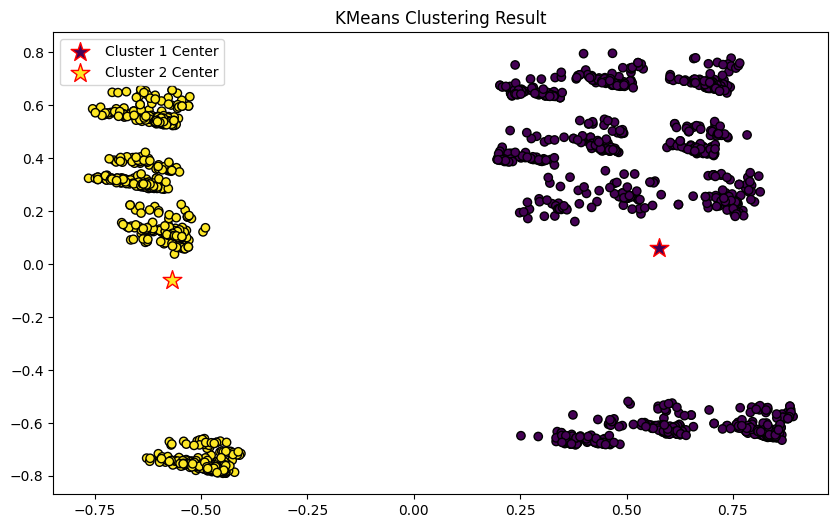

In [ ]:
# Initialize KMeans with 2 clusters and other parameters
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

# Fit KMeans model to the principal components data and predict cluster labels
kmeans.fit(principal_components)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a scatter plot of the principal components, color-coded by cluster labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis', edgecolors='k')

# Plot cluster centers with different markers and colors
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], c=scatter.to_rgba(i), marker='*', s=200, edgecolors='red', linewidth=1, label=f'Cluster {i+1} Center')

# Set title and legend for the plot
plt.title('KMeans Clustering Result')
plt.legend()

# Display the plot
plt.show()

## 5. K-means Clustering Exercise (15 points)
Manually divide a given set of points into clusters using the K-means clustering.

You are given the following two-dimensional points: <br>
*   A:(2,2)
*   B:(2,6)
*   C:(3,7)
*   D:(5,5)
*   E:(6,2)
*   F:(7,4)
*   G:(8,7)

**Tasks:**
1.   **Visualize the Data**: Plot these points and label each point for easy identification (3 points).
2.   **Choose Initial Cluster Centers**: Arbitrarily select three points as initial cluster centers (For example, you might choose points A and D) and **Answer the questions** (12 points).











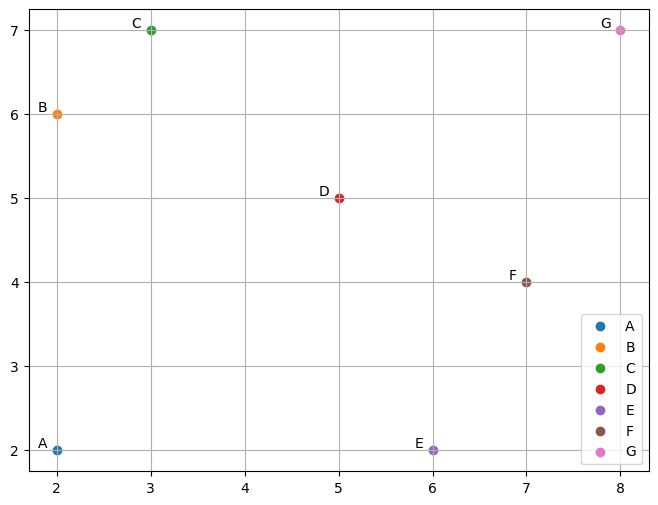

In [ ]:
points = {
    'A': (2, 2),
    'B': (2, 6),
    'C': (3, 7),
    'D': (5, 5),
    'E': (6, 2),
    'F': (7, 4),
    'G': (8, 7)
}

# Extract x and y coordinates
x_values = [point[0] for point in points.values()]
y_values = [point[1] for point in points.values()]

# Plot the points
plt.figure(figsize=(8, 6))
for label, (x, y) in points.items():
    plt.scatter(x, y, label=label)
    plt.text(x - 0.1, y, label, fontsize=10, ha='right', va='bottom')  # Add label near the point

plt.legend()
plt.grid(True)
plt.show()

**Questions**:
1.   How did the points group together in the final iteration?
2.   Was choosing different initial cluster centers leading to different final clusters? Why might this happen?
3.   Think of any real-world scenarios where K-means clustering could be useful?






**Answers**:
1.  
*   Cluster 1 - Points: A | Centroid: (2,2)
*   Cluster 2 - Points: B,C | Centroid: (6.5, 4.5)
*   Cluster 3 - Points: D,E,F,G | Centroid: (2.5, 6.5)

2. K-means aims to minimize the sum of squared distances between data points and their respective cluster centers. However, it may converge to different local optima depending on the initial cluster centers. This phenomenon arises because K-means is not guaranteed to converge to the global optimum.
3. Customer segmentation based on their purchasing habits in order to create tailored sales strategies for customer groups.

## 6. Bonus - Compute projection (5 points)
**Notice:** No code required in this section.

Given the next PCA projection matrix
$\begin{pmatrix}
1 & 1\\
2 & -1
\end{pmatrix}$
And the correspoding egienvalues
$(5, -1)$

Compute the projection to one dimension of the next two vectors:
\begin{pmatrix}
1 & 3
\end{pmatrix}
\begin{pmatrix}
3 & 7
\end{pmatrix}

$\begin{pmatrix}
1 & 3\\
3 & 7
\end{pmatrix}$ ⋅ $\begin{pmatrix}1 \\ 2\end{pmatrix}$ = $\begin{pmatrix}7 \\ 17\end{pmatrix}$